In [31]:
library(nycflights13)
library(tidyverse) 
library(ggplot2)

In [24]:
data("flights") 

flight_data <- flights

str(flight_data)
dim(flight_data)
glimpse(flight_data)

tibble [336,776 × 19] (S3: tbl_df/tbl/data.frame)
 $ year          : int [1:336776] 2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month         : int [1:336776] 1 1 1 1 1 1 1 1 1 1 ...
 $ day           : int [1:336776] 1 1 1 1 1 1 1 1 1 1 ...
 $ dep_time      : int [1:336776] 517 533 542 544 554 554 555 557 557 558 ...
 $ sched_dep_time: int [1:336776] 515 529 540 545 600 558 600 600 600 600 ...
 $ dep_delay     : num [1:336776] 2 4 2 -1 -6 -4 -5 -3 -3 -2 ...
 $ arr_time      : int [1:336776] 830 850 923 1004 812 740 913 709 838 753 ...
 $ sched_arr_time: int [1:336776] 819 830 850 1022 837 728 854 723 846 745 ...
 $ arr_delay     : num [1:336776] 11 20 33 -18 -25 12 19 -14 -8 8 ...
 $ carrier       : chr [1:336776] "UA" "UA" "AA" "B6" ...
 $ flight        : int [1:336776] 1545 1714 1141 725 461 1696 507 5708 79 301 ...
 $ tailnum       : chr [1:336776] "N14228" "N24211" "N619AA" "N804JB" ...
 $ origin        : chr [1:336776] "EWR" "LGA" "JFK" "JFK" ...
 $ dest          : ch

[1] 336776     19

Rows: 336,776
Columns: 19
$ year           <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2…
$ month          <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ day            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ dep_time       <int> 517, 533, 542, 544, 554, 554, 555, 557, 557, 558, 558, …
$ sched_dep_time <int> 515, 529, 540, 545, 600, 558, 600, 600, 600, 600, 600, …
$ dep_delay      <dbl> 2, 4, 2, -1, -6, -4, -5, -3, -3, -2, -2, -2, -2, -2, -1…
$ arr_time       <int> 830, 850, 923, 1004, 812, 740, 913, 709, 838, 753, 849,…
$ sched_arr_time <int> 819, 830, 850, 1022, 837, 728, 854, 723, 846, 745, 851,…
$ arr_delay      <dbl> 11, 20, 33, -18, -25, 12, 19, -14, -8, 8, -2, -3, 7, -1…
$ carrier        <chr> "UA", "UA", "AA", "B6", "DL", "UA", "B6", "EV", "B6", "…
$ flight         <int> 1545, 1714, 1141, 725, 461, 1696, 507, 5708, 79, 301, 4…
$ tailnum        <chr> "N14228", "N24211", "N619AA", "N804JB", "N668DN", "N394…
$ origin      

In [26]:

sum(is.na(flight_data$dep_delay))
sum(is.na(flight_data$arr_delay))

[1] 8255

[1] 9430

In [28]:
cleaned_data <- flight_data %>%
  filter(!is.na(dep_delay), !is.na(arr_delay))


nrow(flight_data)   
nrow(cleaned_data)

[1] 336776

[1] 327346

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 8255 rows containing non-finite outside the scale range (`stat_bin()`).”


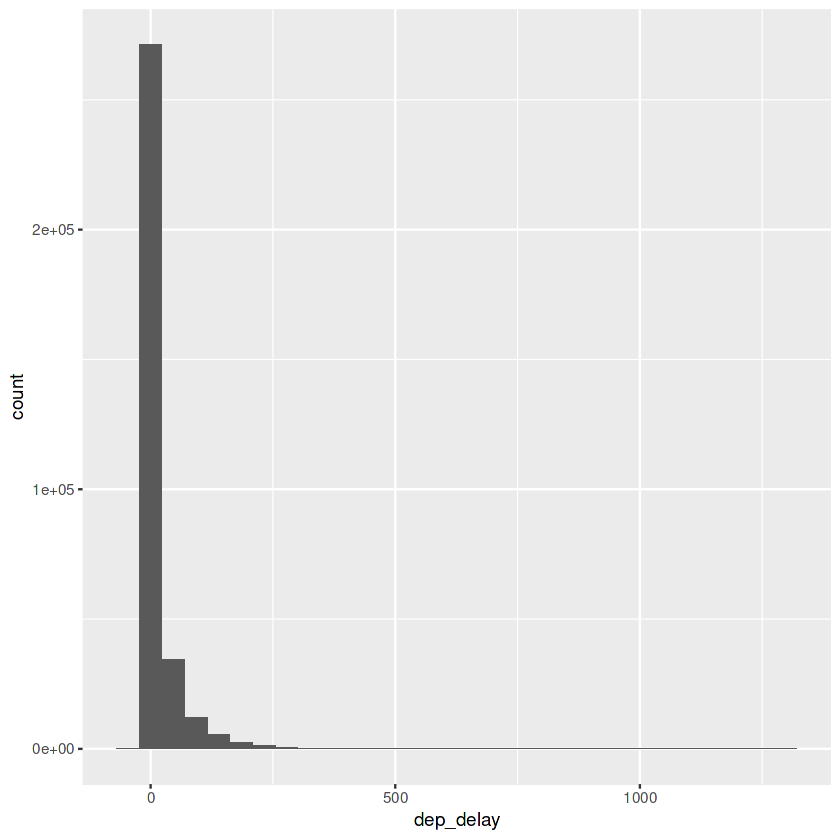

In [35]:
ggplot(data = flights, mapping = aes(x = dep_delay)) + 
  geom_histogram()

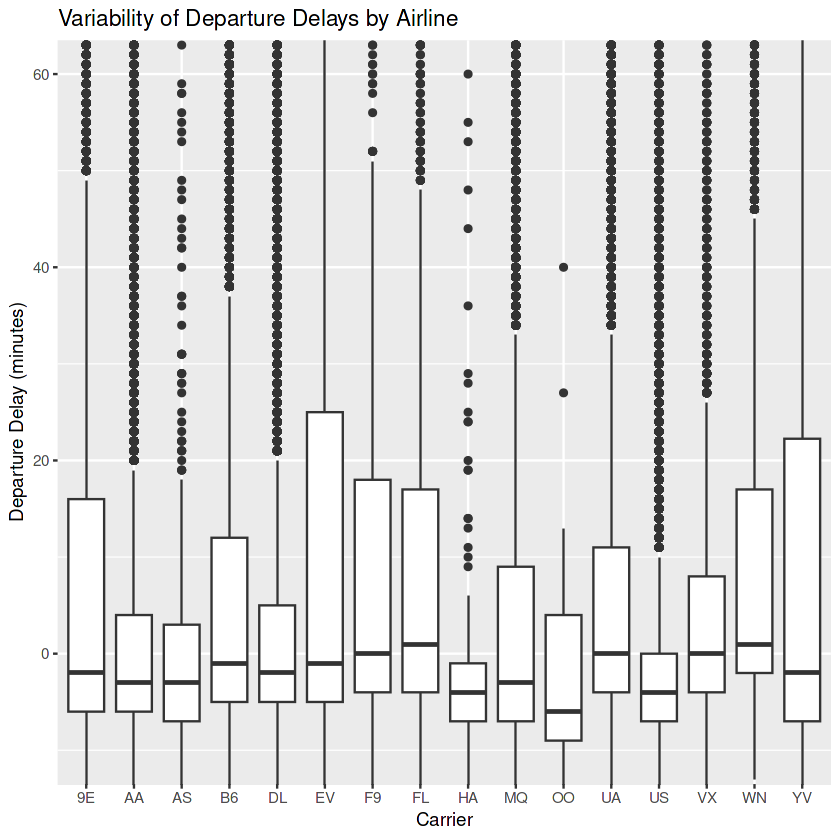

In [46]:
ggplot(data = cleaned_data, mapping = aes(x = carrier, y = dep_delay)) +
  geom_boxplot() +
  coord_cartesian(ylim = c(-10, 60)) +
  labs(
    title = "Variability of Departure Delays by Airline",
    y = "Departure Delay (minutes)",
    x = "Carrier"
  )

The airline that shows the greatest variability in delays is likely YV or EV.

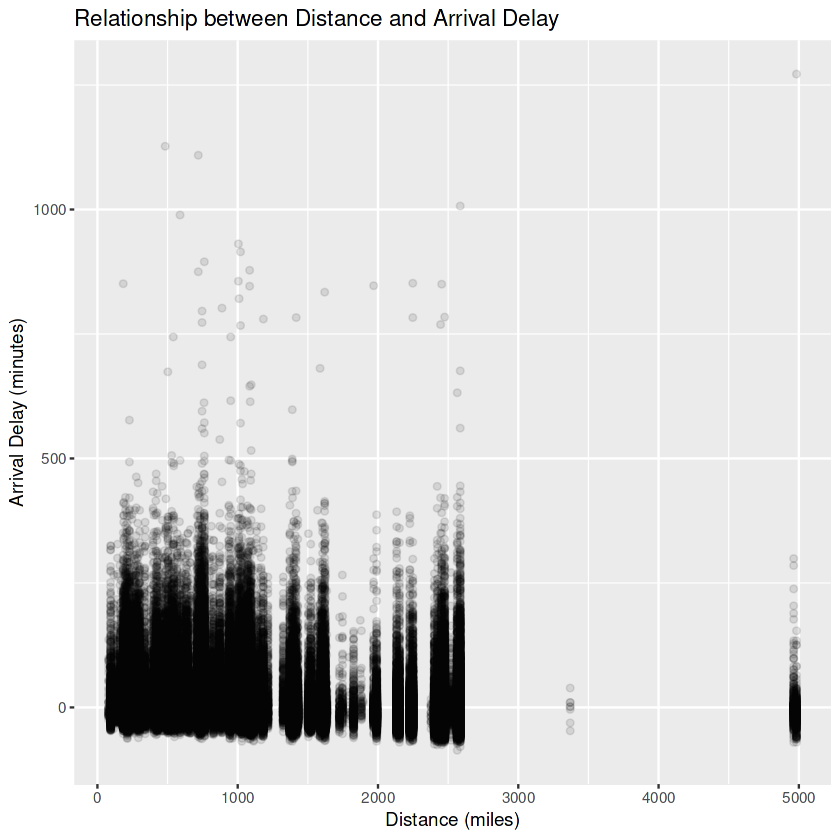

In [38]:
ggplot(data = cleaned_data, mapping = aes(x = distance, y = arr_delay)) +
  geom_point(alpha = 0.1) +       
  labs(                          
    title = "Relationship between Distance and Arrival Delay",
    x = "Distance (miles)",
    y = "Arrival Delay (minutes)"
  )

In [43]:
print("mean of dep_delay:")
mean(cleaned_data$dep_delay)
print("median of dep_delay:")
median(cleaned_data$dep_delay)


[1] "mean of dep_delay:"


[1] 12.55516

[1] "median of dep_delay:"


[1] -2

In [44]:
print("mean of arr_delay:")
mean(cleaned_data$arr_delay)
print("median of arr_delay:")
median(cleaned_data$arr_delay)

[1] "mean of arr_delay:"


[1] 6.895377

[1] "median of arr_delay:"


[1] -5

The mean and median are different because the median is usually the raw value from the dataset itself while the mean is calculated through adding all the values together. By adding, we usually do not obtain a value present in the dataset.

C2: Based on the analysis, flight distance does not appear to be a strong predictor of flight delays. The scatter plot of Distance vs. Arrival Delay reveals no linear correlation, as significant delays are distributed across both short and long-haul flights rather than increasing with distance. The plot, however, shows a high concentration of extreme delays among shorter flights, suggesting that other factors, such as airport congestion or carrier operations, are likely more significant drivers of delays than the distance traveled.